In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [56]:
df=pd.read_csv('AirPassengers.csv',header=0,index_col=0,parse_dates=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [57]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [58]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [59]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [60]:
df.isnull().sum()

#Passengers    0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [62]:
#visualizing the data

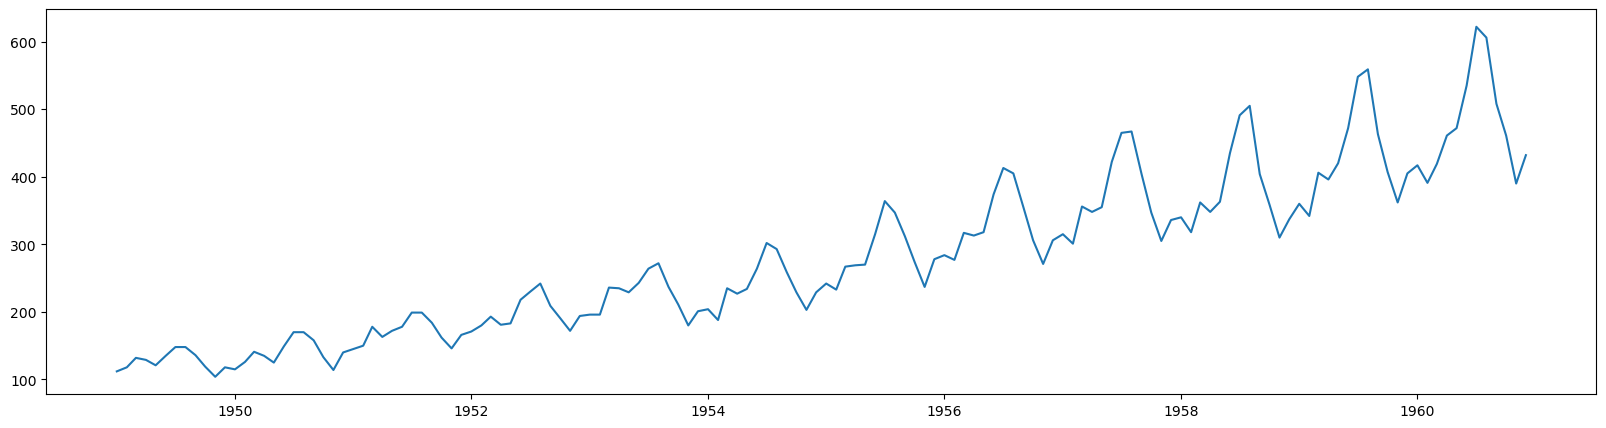

In [63]:
plt.figure(figsize=(20,5))
plt.plot(df)


<Axes: xlabel='#Passengers', ylabel='Density'>

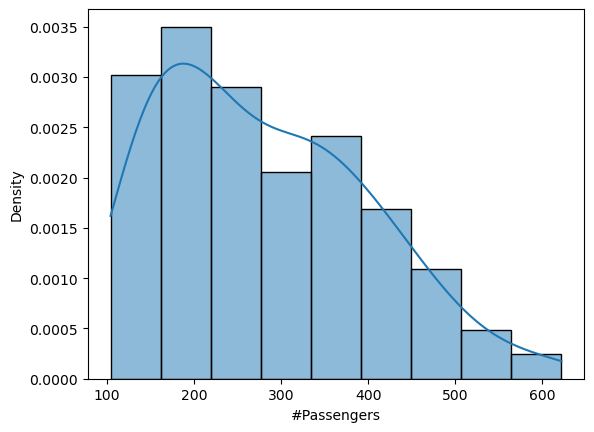

In [66]:
sns.histplot(df['#Passengers'],kde=True,stat='density')

<Figure size 640x480 with 0 Axes>

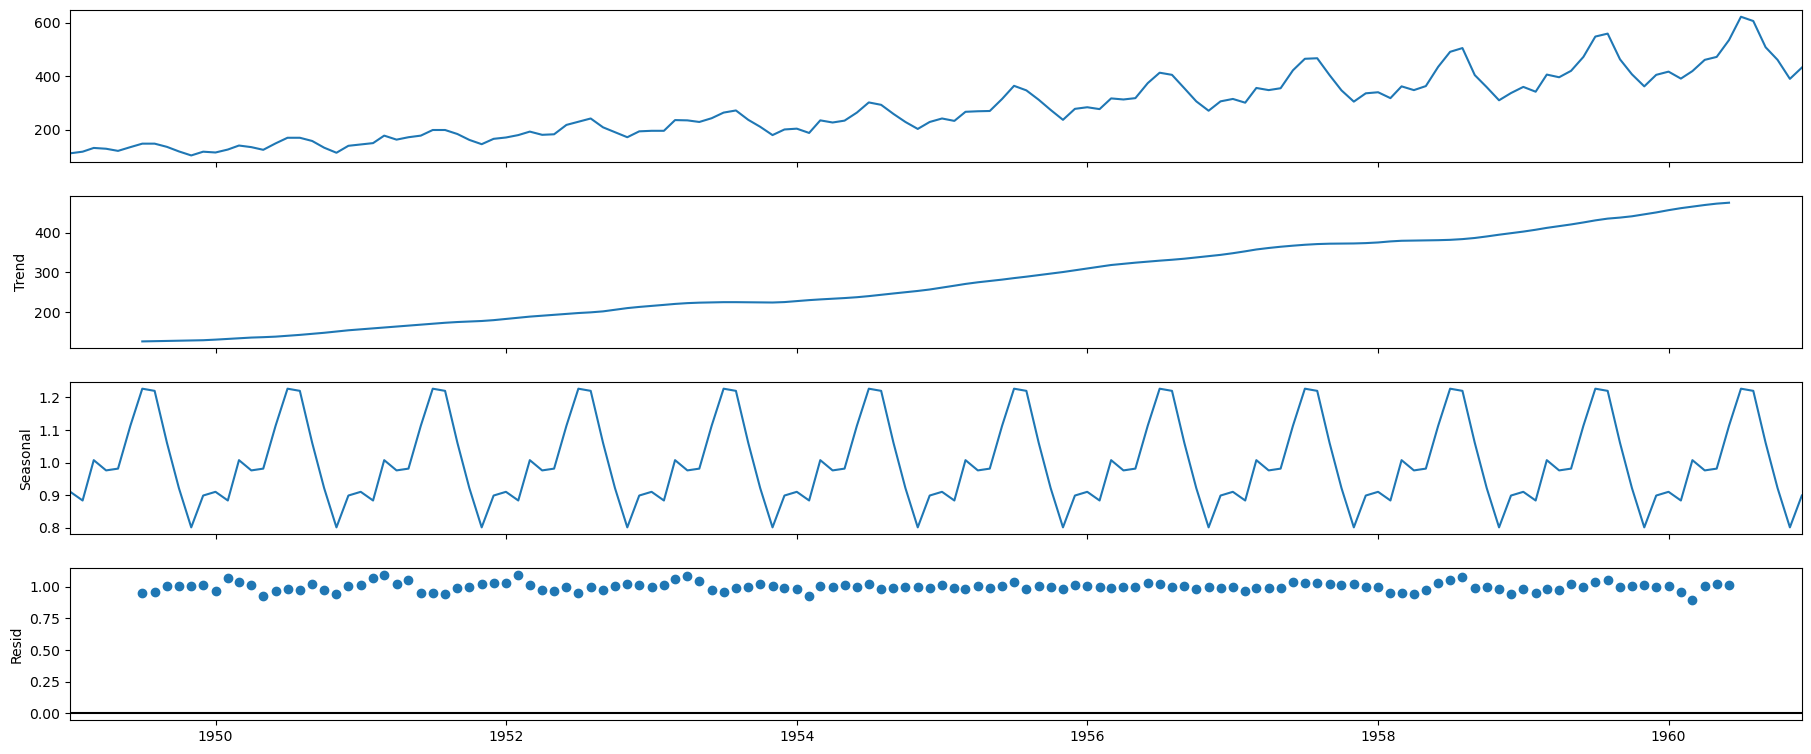

In [67]:
seasonal=seasonal_decompose(df,model='multiplicative',period=12)
fig=plt.figure()
fig=seasonal.plot()
fig.set_size_inches(20,8)

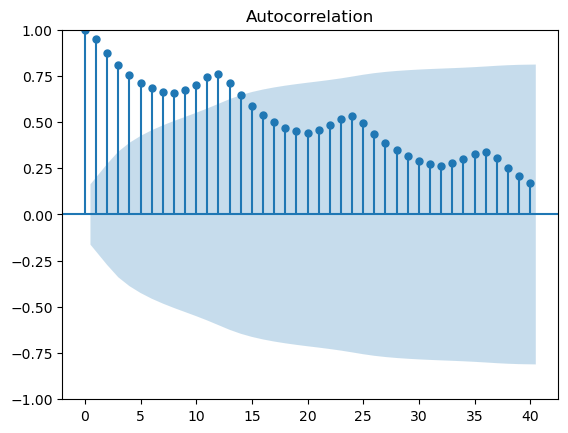

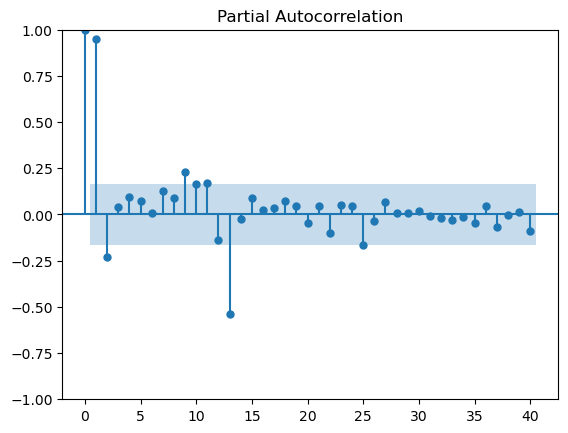

In [68]:
acf=plot_acf(df['#Passengers'],lags=40)
pacf=plot_pacf(df['#Passengers'],lags=40)

In [69]:
#adf test

In [70]:
SPLITTING THE DATA

ADF Statistic:0.815369
p_value:0.991880
Critical Values:
	1%:-3.481682
	5%:-2.884042
	10%:-2.578770


In [71]:
#splitting the data

In [72]:
train=df.loc[:'1959']
test=df.loc['1960':]

In [73]:
test.shape

(12, 1)

In [74]:
train.shape

(132, 1)

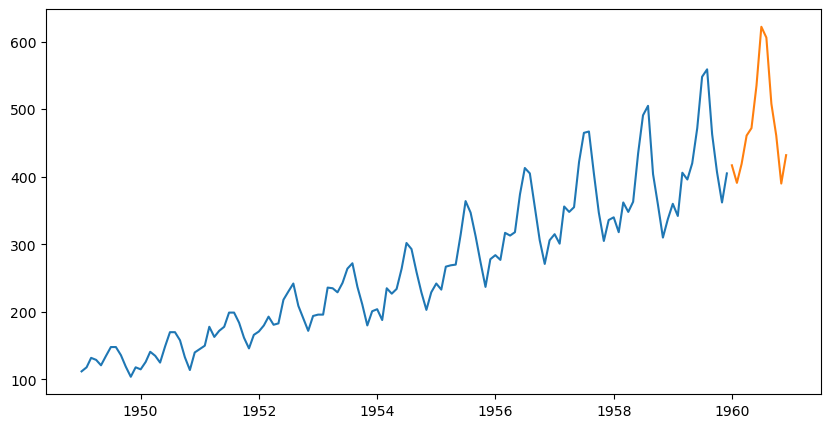

In [75]:
plt.figure(figsize=(10,5))
plt.plot(train)
plt.plot(test)

In [76]:
#ARIMA MODEL

In [77]:
arima_model=auto_arima(train,start_p=0,d=1,start_q=0,
                      start_P=0,D=1,start_Q=0,
                      max_p=5,max_q=5,max_d=5,
                      max_P=5,max_Q=5,max_D=5,m=12,
                      seasonal=True,error_action='warn',
                      trace=True,supress_warnings=True,
                      stepwise=True,
                      randon_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=905.065, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=900.823, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=901.721, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=899.902, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=901.052, Time=0.09 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=901.337, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=900.971, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=900.685, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=902.967, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=901.457, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 0.968 seconds


In [78]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -447.951
Date:                            Fri, 01 Sep 2023   AIC                            899.902
Time:                                    11:23:31   BIC                            905.460
Sample:                                01-01-1949   HQIC                           902.159
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2431      0.090     -2.697      0.007      -0.420      -0.066
sigma2       108.8757     13.306      8.183      0.000      82.797     134.954
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.89   Prob(JB):                         0.75
Heteroskedasticity (H):               1.47   Skew:                            -0.03
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

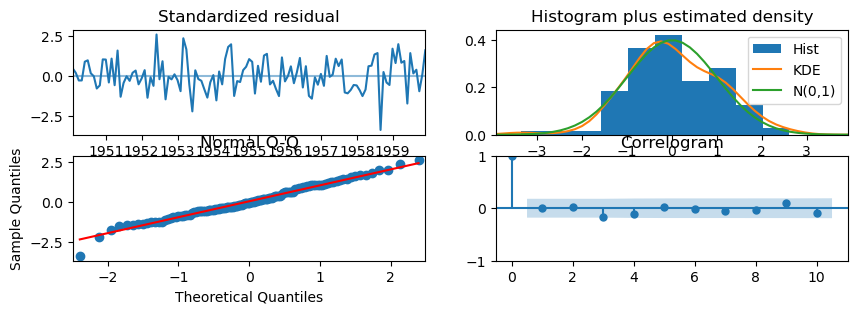

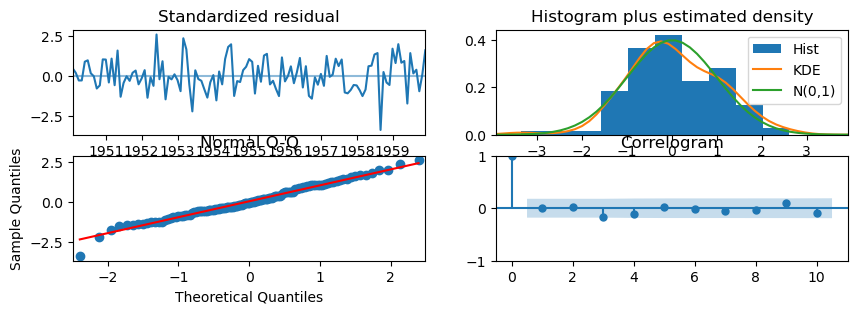

In [87]:
arima_model.plot_diagnostics(figsize=(10,3))

In [79]:
prediction=pd.DataFrame(arima_model.predict(n_periods=12),index=test.index)
prediction.columns=['predicted_pasengers']
prediction

,predicted_pasengers
Month,
1960-01-01,424.109830
1960-02-01,407.055669
1960-03-01,470.825702
1960-04-01,460.881615
1960-05-01,484.868020
1960-06-01,536.871326
1960-07-01,612.870522
1960-08-01,623.870717
1960-09-01,527.870670


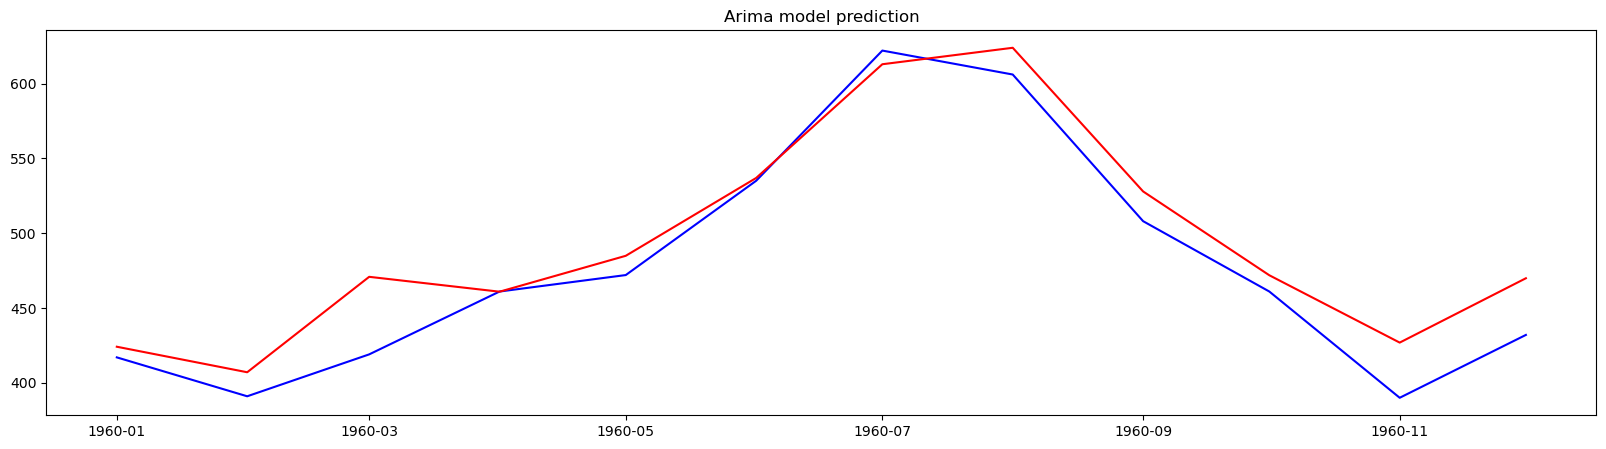

In [80]:
plt.figure(figsize=(20,5))                                                                                  
plt.plot(test,color='blue',label="Test")
plt.plot(prediction,color='red',label="predicted")
plt.title('Arima model prediction')
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
from math import sqrt

In [82]:
test['predicted_pasengers']=prediction

C:\Users\user\AppData\Local\Temp\ipykernel_6084\3311489741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_pasengers']=prediction


In [83]:
rmse=sqrt(mean_squared_error(test['#Passengers'],test['predicted_pasengers']))
print('RMSE:',rmse)


RMSE: 23.93167320849702


In [84]:
mape=mean_absolute_percentage_error(test['#Passengers'],test['predicted_pasengers'])
print('MAPE:',mape)

MAPE: 0.04182388633651619


In [85]:
r2=r2_score(test['#Passengers'],test['predicted_pasengers'])
print('R2 SCORE:',r2)

R2 SCORE: 0.8966101896385106
